In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# patching
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

# can now import files normally

In [3]:
df_045 = pd.read_excel("../../data/ad8400/Характеристика_ad8400_045 (1).xlsx")

In [4]:
df_045

,code,resistance
0,0,42.79
1,1,49.49
2,2,53.39
3,3,58.39
4,4,62.30
...,...,...
251,251,1145.00
252,252,1149.00
253,253,1154.00
254,254,1158.00


In [5]:
df_020 = pd.read_excel("../../data/ad8400/Характеристика_ad8400_020 (1).xlsx")

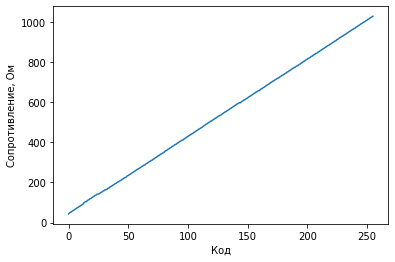

In [20]:
plt.xlabel("Код")
plt.ylabel("Сопротивление, Ом")
plt.plot(df_020["code"], df_020["resistance"], label="asdasd")

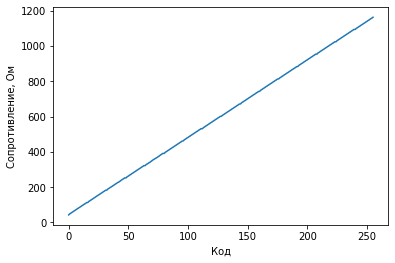

In [19]:
plt.xlabel("Код")
plt.ylabel("Сопротивление, Ом")
plt.plot(df_045["code"], df_045["resistance"])

In [10]:
resistances = []
r1_codes = []
r2_codes = []

for _, r1 in df_045.iterrows():
    for _, r2 in df_020.iterrows():
            resistance = round((r1["resistance"] * r2["resistance"]) / (r1["resistance"] + r2["resistance"]), 5)
            resistances.append(resistance)
            r1_code = int(r1["code"])
            r1_codes.append(r1_code)
            r2_code = int(r2["code"])
            r2_codes.append(r2_code)

resistances_df = pd.DataFrame(
    {
        "resistance": resistances,
        "r1_code": r1_codes,
        "r2_code": r2_codes,
    }
)

del resistances
del r1_codes
del r2_codes

In [13]:
resistances_df = resistances_df.sort_values(by=["resistance"])

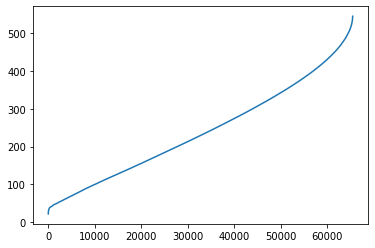

In [14]:
plt.plot(list(resistances_df["resistance"]))

In [8]:
from typing import Iterable
from numbers import Number
from utils.utils import find_nearest


def create_dataframe(
        path_to_resistance_thermometer,
        possible_values: pd.DataFrame,
        digipot1_data: pd.DataFrame,
        digipot2_data: pd.DataFrame,
) -> pd.DataFrame:
    df = pd.read_csv(path_to_resistance_thermometer)
    df["calc"] = df["R"].apply(lambda x: find_nearest(possible_values["resistance"], x))
    df["error"] = abs(df["R"] - df["calc"])
    df["R1_code"] = df["calc"].apply(lambda x: int(possible_values[possible_values["resistance"] == x].iloc[0]["r1_code"]))
    df["R2_code"] = df["calc"].apply(lambda x: int(possible_values[possible_values["resistance"] == x].iloc[0]["r2_code"]))
    df["R1"] = df["R1_code"].apply(lambda x: digipot1_data[digipot1_data["code"] == x].iloc[0]["resistance"])
    df["R2"] = df["R2_code"].apply(lambda x: digipot2_data[digipot2_data["code"] == x].iloc[0]["resistance"])
    return df

In [15]:
df_50m = create_dataframe("../../data/sensors_characteristics/50М.csv", resistances_df, df_045, df_020)

In [16]:
df_50m

,T,R,calc,error,R1_code,R2_code,R1,R2
0,-50,39.30,39.29435,0.00565,0,113,42.79,481.00
1,-49,39.51,39.50743,0.00257,0,122,42.79,515.00
2,-48,39.73,39.72240,0.00760,100,0,482.00,43.29
3,-47,39.94,39.94127,0.00127,7,10,76.49,83.59
4,-46,40.16,40.15810,0.00190,0,158,42.79,652.90
...,...,...,...,...,...,...,...,...
146,96,70.54,70.54113,0.00113,70,11,350.90,88.29
147,97,70.76,70.75964,0.00036,95,10,461.00,83.59
148,98,70.97,70.97283,0.00283,11,64,94.29,287.00
149,99,71.19,71.19279,0.00279,7,255,76.49,1028.00


In [54]:
df_50m["R1_code"].dtype

dtype('int64')

In [49]:
# resistances_df.to_csv("../../data/ad8400/parallel.csv", index=False)

In [17]:
df_50m

,T,R,calc,error,R1_code,R2_code,R1,R2
0,-50,39.30,39.29435,0.00565,0,113,42.79,481.00
1,-49,39.51,39.50743,0.00257,0,122,42.79,515.00
2,-48,39.73,39.72240,0.00760,100,0,482.00,43.29
3,-47,39.94,39.94127,0.00127,7,10,76.49,83.59
4,-46,40.16,40.15810,0.00190,0,158,42.79,652.90
...,...,...,...,...,...,...,...,...
146,96,70.54,70.54113,0.00113,70,11,350.90,88.29
147,97,70.76,70.75964,0.00036,95,10,461.00,83.59
148,98,70.97,70.97283,0.00283,11,64,94.29,287.00
149,99,71.19,71.19279,0.00279,7,255,76.49,1028.00
